In [79]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

sns.get_dataset_names()

tips = sns.load_dataset("tips")
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'], dtype=int)
display(tips)

X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)


,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,0,0,1,0,0,1,0,0,1
240,27.18,2.00,2,0,1,1,0,0,0,1,0,0,1
241,22.67,2.00,2,1,0,1,0,0,0,1,0,0,1
242,17.82,1.75,2,1,0,0,1,0,0,1,0,0,1


[[13.28  2.    1.   ...  0.    0.    1.  ]
 [24.27  2.    1.   ...  0.    0.    1.  ]
 [27.28  2.    1.   ...  0.    0.    1.  ]
 ...
 [ 5.75  2.    0.   ...  0.    0.    1.  ]
 [34.63  2.    1.   ...  1.    0.    1.  ]
 [44.3   3.    0.   ...  0.    0.    1.  ]]


$$
\begin{align}
& Loss = MSE = \frac{1}{N}\sum^{N}_{i=1}(y_{i, true} - y_{i, pred})^2 \\
& \text{위 Loss를 가중치를 업데이트하기 위해 미분값을 구해보면} \\
& \frac{\sigma L}{\sigma w_i} = \frac{\sigma {\frac{1}{N}\sum^{N}_{i=1}(y_{i, true} - y_{i, pred})^2}}{\sigma w_i} \\

& \sum 연산안으로 미분연산을 집어넣어도 변하지 않으므로 안으로 밀어넣는다 \\
& \frac{\sigma L}{\sigma w_i} = \frac{1}{N}\sum^{N}_{i=1}\frac{\sigma (y_{i, true} - y_{i, pred})^2}{\sigma w_i} \\
& \frac{\sigma L}{\sigma w_i} = \frac{1}{N}\sum^{N}_{i=1} 2(y_{i, true} - y_{i, pred}) \times \frac{\sigma (y_{i, true} - y_{i, pred})}{\sigma w_i} \\
& \frac{\sigma L}{\sigma w_i} = \frac{1}{N}\sum^{N}_{i=1} 2(y_{i, true} - y_{i, pred}) \times (-x_i) \\
& \text{(6)번 식에서} \enspace \frac{\sigma (y_{i, true} - y_{i, pred})}{\sigma w_i} \text{식은 각 차원별로 편미분하면 되므로} \\
& \frac{\sigma (y_{i, true} - y_{i, pred})}{\sigma w_i} = \frac{\sigma \{y_{i,true} - (w_1 x_1) + \cdots + (w_N x_N) + b\}}{\sigma w_i} \\
& w_i \text{이외의 변수들은 모두 상수가 되므로} \\
&& = -x_i
\end{align}

$$

In [133]:
def model(X, W, b):
    predictions = 0
    for i in range(W.shape[0]):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions


def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse


def loss(X, y, W, b):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L


def gradient(X, y, W, b):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()

    return dW, db



def train(X, y, epoch=1000, learning_rate=0.0001):
    losses = []

    W = np.random.rand(12)
    b = np.random.rand()
    
    for i in range(epoch):
         dw, db = gradient(X, y, W, b)
         W -= learning_rate * dw
         b -= learning_rate * db
         L = loss(X, y, W, b)
         losses.append(L)
         
         if i % 100 == 0:
            print(f'Iteration[{i}]: Loss {L}')

    return losses, W, b

losses, W, b = train(X_train, y_train)
print(W, b)


Iteration[0]: Loss 35.08355366806453
Iteration[100]: Loss 1.4675344266915937
Iteration[200]: Loss 1.461569973015883
Iteration[300]: Loss 1.4557449649182648
Iteration[400]: Loss 1.4500548524712311
Iteration[500]: Loss 1.4444952926059158
Iteration[600]: Loss 1.4390621113474558
Iteration[700]: Loss 1.4337512966693047
Iteration[800]: Loss 1.4285589916592938
Iteration[900]: Loss 1.4234814879836573
[ 0.06104477 -0.01156285  0.65895824  0.50624663  0.0253384   0.00542825
  0.71761716  0.49452699  0.46276884  0.22775694  0.40064188  0.44055633] 0.5638398201953368


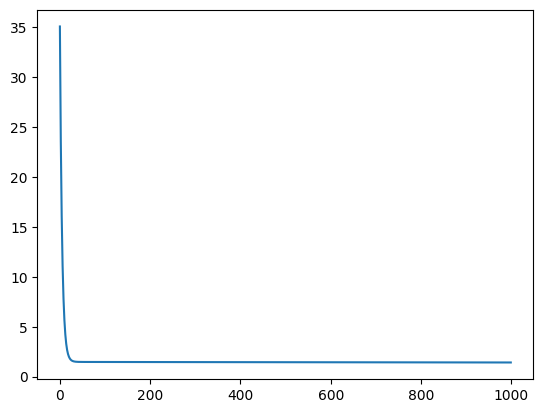

0.9049979744724758


In [134]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

prediction = model(X_test, W, b)
mse = loss(X_test, y_test, W, b)
print(mse)

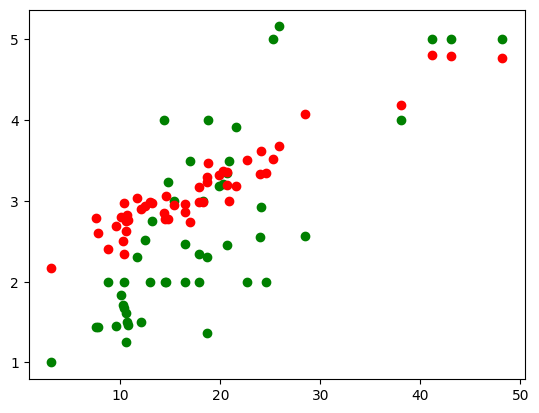

In [135]:
plt.scatter(X_test[:, 0], y_test, c="g")
plt.scatter(X_test[:, 0], prediction, c="red")

plt.show()

# 실험 결과
## learning rate가 작을 수록 좋고 크면 loss가 발산한다
lr이 0.001보다 큰 경우 nan값이 등장하며서 loss가 계산될 수 없었고, lr이 매우 작아야만 됬다.  
무슨 차일까.
## 가중치와 바이어스 초기화 값에 따라 너무 성능차이가 심했다.
w = np.array([1 for i in range(12)]) 와 b=2를 줬을 때 모델은 아무리 학습하고 lr을 줄여도  
loss만 낮을 뿐 test 데이터에 대해 예측률이 심각하게 떨어졌다.  
이유를 모르겠다.